# Loan Modeling Project 
# Which customer is most likely to get a loan?
Presented By Christian Freeman 
Jan 15, 2011  

#Project Planning
## PLAN ==> Acquire ==> Prepare ==> Explore ==> Model &Evaluate ==> Deliver

Understanding consumer behavior can quite chanlenging, especially when the product we offer our customers is a service rather than a tangible physical products. In the case of predicting which customer is most likely to get a loan,, I will perform the following:


- Prepare the data for visualization using a customized  module wrangle.py
- Identify patterns and insights 
- Document key observations and relationships between variables 

 
## Goals and summary
My goal in this project is to:

- Identify the characteristics of customers who are more likely to get a loan, and the potential reasons for this behavior.
- Build a ML model to predict which customer may sign up for a loan
So that recommendations are made based on the findings to help increase the chances of giving  a loan the the right customer.
- I will be using Python, Pandas, Matplotlib, Seaborn, and Scikit-Learn libraries to analyse and create ML classification model.

## Initial Questions
* What are unique characteristics of our customers?
* What factors increase their chances of getting a loan ?
* can we predict loan subscribers ?
 
## Executive Summary
### Findings Include:
- Many outliers in Income, Mortgage , and CCAvg colums
- Experience column has  some 0 values as well as some  negative values including -1,-2, -3 . All were converted to absolute value, since replacing with the mean experience of 20 years did not make sense. This is because  most customers with these values have less than 30 years of age


In [1]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# libaries to help with data visualization

import seaborn as sns
import matplotlib.pyplot as plt
# This is a premade module for exploration to help make the notebook readeable 
import acquire
import  wrangle
import explore
import modeling
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample
# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Acquire Data

- Data for the project acquired from https://www.kaggle.com/itsmesunil/bank-loan-modelling

In [2]:
#import the raw df
raw_df = wrangle.loan_raw_summary()

COLUMNS NAMES OF SBA Loan DATASET

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

THE SHAPE OF SBA Loan DATASET

The SBA Loan dataset has 5000 rows and 14 columns

SBA Loan INFO AND DATA TYPES, NEEDS TO EXAMINE TOTAL CHARGES MORE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   

In [3]:
#loading our data in a dataframe
prepped_data = wrangle.prep_loan()

In [4]:
prepped_data.head()

,id,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# making a copy of the data
loan= prepped_data.copy()

In [6]:
#viewing the shape
loan.shape

(5000, 14)

In [7]:
# information about data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zipcode             5000 non-null   object 
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 547.0+ KB


In [8]:
# descriptive statistical summary 
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
personal_loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
securities_account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
cd_account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [9]:
loan.isnull().sum()

id                    0
age                   0
experience            0
income                0
zipcode               0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64

In [10]:
# Performed values counts on all the columns and the Experience column has negative values
loan.experience.value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: experience, dtype: int64

In [11]:
# Our target variable is personal loan 
target = 'personal_loan'

## Observations 
- Dataset has 5000 rows and 14 colums
- categorical columns are Family, Education, Securities_Account ,CD_Account, Online, CreditCard, Personal_Loan
- Quantitative columns are Age, Income , CCAvg, and Mortgage 
- Target Variable is 'Personal_Loan'
- No missing values 
- Experience column has negative values and i am going to use abs() function to resolve that
- Mean Age is 45 
- Mean Income, Mortgage , and CCAvg are greater then their repective median. This suggest we may have some outliers


In [12]:
# Replacing negative Experience with absolute value. 
loan['experience'] = loan['experience'].abs()

# Prepare For Exploration

## Split data into Train, Validate, Test

In [13]:
train, validate, test = modeling.train_validate_test_split(loan, target,seed=42)

train_encoded, shape: (2800, 14)
validate_encoded, shape: (1200, 14)
test_encoded, shape: (1000, 14)


In [14]:
train.shape, validate.shape, test.shape

((2800, 14), (1200, 14), (1000, 14))

In [15]:
train.head()

,id,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
2751,2752,47,23,32,92251,4,0.60,1,156,0,0,0,1,1
2780,2781,39,13,69,90630,3,0.90,2,0,0,0,0,0,0
4552,4553,50,23,64,92037,1,2.67,2,0,0,0,0,0,0
3648,3649,43,13,38,95616,3,2.00,3,0,0,0,0,1,0
3220,3221,61,35,28,93302,2,0.20,3,135,0,0,0,1,0


### Univariate Analysis 

In [16]:
loan.personal_loan.value_counts()

0    4520
1     480
Name: personal_loan, dtype: int64

In [17]:
# Declaring variable to use in our premade functions in the wrangle module 
cat_var = ['family','education','securities_account','cd_account','online','creditcard']
cat_vars = ['family','education','securities_account','cd_account','online','creditcard','personal_loan']
quant_vars = ['age','income','ccavg','mortgage']
quant_vars2 = ['age','income','ccavg']


# Explore
## Univariate visualization 
- Exploring the data using custom made functions stored in the wrangle module

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 2751 to 3006
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2800 non-null   object 
 1   age                 2800 non-null   int64  
 2   experience          2800 non-null   int64  
 3   income              2800 non-null   int64  
 4   zipcode             2800 non-null   object 
 5   family              2800 non-null   int64  
 6   ccavg               2800 non-null   float64
 7   education           2800 non-null   int64  
 8   mortgage            2800 non-null   int64  
 9   personal_loan       2800 non-null   int64  
 10  securities_account  2800 non-null   int64  
 11  cd_account          2800 non-null   int64  
 12  online              2800 non-null   int64  
 13  creditcard          2800 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 328.1+ KB


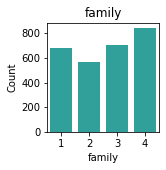

   family  Count  Percent
1       4    841    30.04
2       3    709    25.32
4       1    684    24.43
3       2    566    20.21
_________________________________________________________________


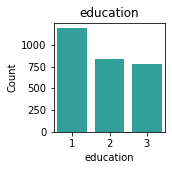

   education  Count  Percent
1          1   1190    42.50
3          2    836    29.86
2          3    774    27.64
_________________________________________________________________


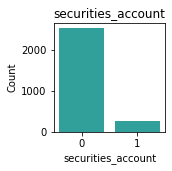

   securities_account  Count  Percent
0                   0   2525    90.18
1                   1    275     9.82
_________________________________________________________________


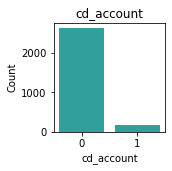

   cd_account  Count  Percent
0           0   2627    93.82
1           1    173     6.18
_________________________________________________________________


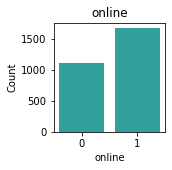

   online  Count  Percent
1       1   1679    59.96
0       0   1121    40.04
_________________________________________________________________


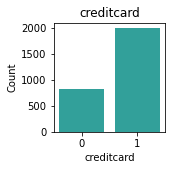

   creditcard  Count  Percent
0           1   1987    70.96
1           0    813    29.04
_________________________________________________________________


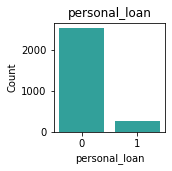

   personal_loan  Count  Percent
0              0   2531    90.39
1              1    269     9.61
_________________________________________________________________


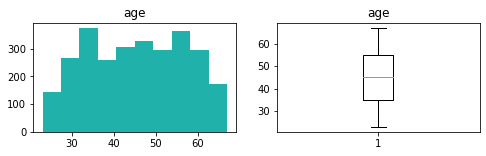

count    2800.000000
mean       45.378214
std        11.526233
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: age, dtype: float64


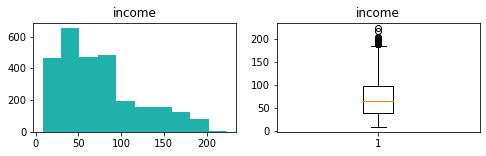

count    2800.000000
mean       73.901429
std        46.830004
min         8.000000
25%        39.000000
50%        63.500000
75%        98.000000
max       224.000000
Name: income, dtype: float64


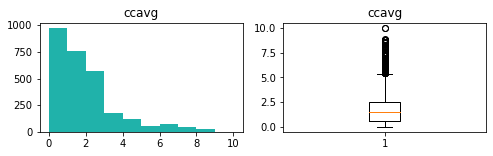

count    2800.000000
mean        1.909639
std         1.741915
min         0.000000
25%         0.600000
50%         1.500000
75%         2.500000
max        10.000000
Name: ccavg, dtype: float64


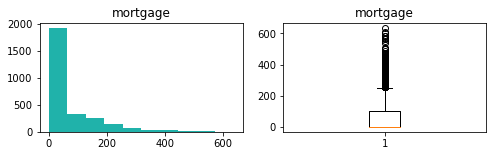

count    2800.000000
mean       56.735357
std       101.228783
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: mortgage, dtype: float64


In [19]:
# calling explore_univariate() function from wrangle to perform univariate Analysis 
explore.explore_univariate(train, cat_vars, quant_vars)

## Key Takeaway from the Univariate Analysis
- Family of 4 represent the majority of the dataset with 29.44 % of the entire data. Followed by family of 3, 1 and 2 with 25.92%, 24.44%, and 20.20% respectively.
- 41.92% are udergrad, 30.02% are graduates, and 28.06% have Advanced/Professional degrees 
- 90.4% of customers do not have personal loan While 9.9% do 
- 89.56% have  Security Accounts, and 10.44% do not 
- 93.96% do not have a Certificate of Deposit while only 6.04% do
- 59.58% don’t use internet banking while 40.32% do
- 70.6% do not have a credit card, while only 29.4% do
- Age has somewhat a uniform distribution with a minimum age of 23, and maximum of 67
- Income is skewed to the right and the graph indicate some outliers 

- Average Spending on credit card (CCavg) is skewed to the right , and have some outliers
- Mortgage is skewed to the right, and the is a stron indication that most customers do not have a mortgage  

### Bivariate Analysis 
#### Hypotheses Questions
- Question 1) H0 = The Average of the family having personal loan is the same in each family groups
- Question 1) H1 = The Average of the family having personal loan is different in each group
                 
------------------------------------------------------------------------------
- Question 2) H0 = The Average of  customers having personal loan is the same in each education groups
- Question 2) H1 = The Average  of customers having personal loan is different in each group
------------------------------------------------------------------------------
- Question 3) H0 = The Average  of  customers having personal loan is the same for those who have Security Account and those who don’t 
- Question 3) H1 = The Average  of customers  having personal loan is different in each subgroup
______________________________________________________________________________
- Question 4) H0 = The Average  of  customers having personal loan is the same for those who have Certificate of deposit Account and those who don’t 
- Question 4) H1 = The Average  of customers  having personal loan is different in each subgroup
--------------------------------------------------------------------------------
- Question 5) H0 = The Average  of  customers having personal loan is the same for those who have Online banking and those who don’t 
- Question 5) H1 = The Average  of customers  having personal loan is different in each subgroup
-------------------------------------------------------------------------------
- Question 6) H0 = The Average  of  customers having personal loan is the same for those who have a Credit card and those who don’t 
- Question 6) H1 = The Average  of customers  having personal loan is different in each subgroup
-------------------------------------------------------------------------------
- Question 7) H0 = The average age of customers  makes a difference in having personal loan
- Question 7) H1 = The Average age of customers  does not make a difference whether or not the customer will have personal loan
--------------------------------------------------------------------------------
- Question 8) H0 = The Average Income of customers  makes a difference in having personal loan
- Question 8) H1 = The Average Income of customers  does not make a difference whether or not the customer will have personal loan
--------------------------------------------------------------------------------
- Question 9) H0 = The average spending of customers  makes a difference in having personal loan
- Question 9) H1 = The Average Spending of customers  does not make a difference whether or not the customer will have personal loan
-------------------------------------------------------------------------------
- Question 10) H0 = The average mortgage  of customers  makes a difference in having personal loan
- Question 10) H1 = The Average mortgage  of customers  does not make a difference whether or not the customer will have personal loan

## Bivariate visualization 

family 
_____________________

        chi2   p-value  degrees of freedom
0  20.823323  0.000115                   3

observed:
 personal_loan     0    1   All
family                        
1               784   57   841
2               648   61   709
3               488   78   566
4               611   73   684
All            2531  269  2800

expected:
             0          1
0  760.203929  80.796071
1  640.885357  68.114643
2  511.623571  54.376429
3  618.287143  65.712857


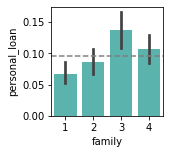


_____________________

education 
_____________________

        chi2       p-value  degrees of freedom
0  63.575465  1.565897e-14                   2

observed:
 personal_loan     0    1   All
education                     
1              1137   53  1190
2               667  107   774
3               727  109   836
All            2531  269  2800

expected:
              0           1
0  1075.675000  114.325000
1   699.640714   74.359286
2   755.684286   80.315714


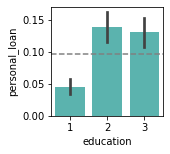


_____________________

securities_account 
_____________________

       chi2   p-value  degrees of freedom
0  1.198461  0.273629                   1

observed:
 personal_loan          0    1   All
securities_account                 
0                   2288  237  2525
1                    243   32   275
All                 2531  269  2800

expected:
              0           1
0  2282.419643  242.580357
1   248.580357   26.419643


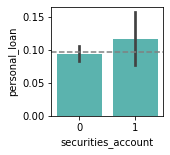


_____________________

cd_account 
_____________________

        chi2       p-value  degrees of freedom
0  307.91154  6.225678e-69                   1

observed:
 personal_loan     0    1   All
cd_account                    
0              2441  186  2627
1                90   83   173
All            2531  269  2800

expected:
              0           1
0  2374.620357  252.379643
1   156.379643   16.620357


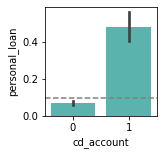


_____________________

online 
_____________________

       chi2   p-value  degrees of freedom
0  0.301619  0.582869                   1

observed:
 personal_loan     0    1   All
online                        
0              1018  103  1121
1              1513  166  1679
All            2531  269  2800

expected:
              0           1
0  1013.303929  107.696071
1  1517.696071  161.303929


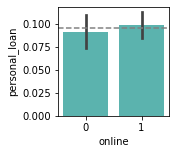


_____________________

creditcard 
_____________________

       chi2   p-value  degrees of freedom
0  0.114384  0.735208                   1

observed:
 personal_loan     0    1   All
creditcard                    
0              1799  188  1987
1               732   81   813
All            2531  269  2800

expected:
              0           1
0  1796.106071  190.893929
1   734.893929   78.106071


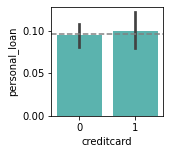


_____________________

age 
____________________



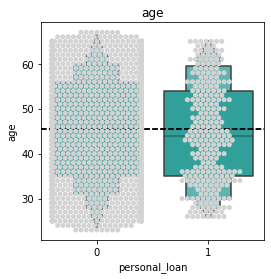

                count       mean        std   min   25%   50%   75%   max
personal_loan                                                            
0              2531.0  45.481233  11.534891  23.0  35.0  46.0  56.0  67.0
1               269.0  44.408922  11.420233  26.0  35.0  44.0  54.0  65.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=358796.5, pvalue=0.14479239438607147)

____________________

income 
____________________



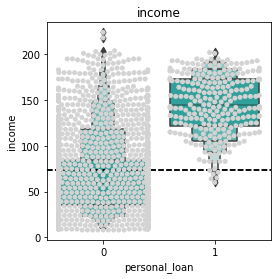

                count        mean        std   min    25%    50%    75%    max
personal_loan                                                                 
0              2531.0   66.342157  41.449801   8.0   35.0   59.0   85.0  224.0
1               269.0  145.026022  32.677005  60.0  122.0  145.0  173.0  202.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=56822.5, pvalue=4.38003054410659e-112)

____________________

ccavg 
____________________



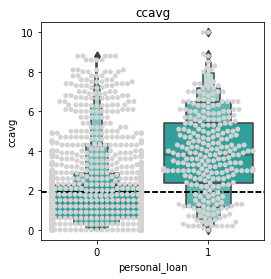

                count      mean       std  min  25%  50%  75%   max
personal_loan                                                      
0              2531.0  1.698546  1.551029  0.0  0.6  1.4  2.3   8.8
1               269.0  3.895799  2.144564  0.0  2.4  3.8  5.4  10.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=134072.5, pvalue=2.8616777126009663e-60)

____________________

mortgage 
____________________



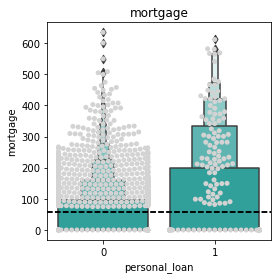

                count       mean         std  min  25%  50%    75%    max
personal_loan                                                            
0              2531.0  52.254445   91.820611  0.0  0.0  0.0   98.0  635.0
1               269.0  98.895911  159.554383  0.0  0.0  0.0  198.0  612.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=310412.0, pvalue=0.003779049897774619)

____________________



In [20]:
# calling bivariate_univariate() function from wrangle to perform univariate Analysis 

explore.explore_bivariate(train, target, cat_var, quant_vars)

## Key Takeaway from the Univariate Analysis
### After performing chi2 test for question 1 through 6 here are the results
- 1) With a low P value, We reject our 1st null hypothesis that the Average of family having personal loan is the same in each family group. Customers with Family of 3 or more are likely to get personal loan than customers with family off 1 or 2
- 2) With a low p value, We reject our 2nd null hypothesis that  The Average of customers having personal loan is the same in each education groups. Customers with graduate and advanced degrees are more likely to get personal loan than undergrad customers 

- 3) With a p value higher than 0.05, We fail reject our 3rd null hypothesis that The Average of customers having personal loan is the same for those who have Security Account and those who don’t. Although the visualization suggest that customers  with Security account may get loan than those who do not own a security Account

- 4) With a low p value, We reject our 4th null hypothesis that  The Average of customers having personal loan is the same for those who have Certificate of deposit Account and those who don’t.

- 5)With a p value higher than 0.05, We fail reject our 3rd null hypothesis that The Average of customers having personal loan is the same for those who have Online banking and those who don’t.

- 6) With a p value higher than 0.05, We fail reject our 3rd null hypothesis that The Average of customers having personal loan is the same for those who have a Credit card and those who don’t.

### After performing Mann-Whitney Test for questions 7 to 10

- 7) With a p  value higher than 0.05 , we fail to  conclude that there is a linear relationship between Age and personal loan

- 8) With  a low p value, we can conclude that there is in fact a linear relationship between Income and personal loan. Although there might be some outliers in the income distribution,  The visualization suggests that customers with highr income are more likely to get loan than those with lower income. 

- 9) With  a low p value, we can conclude that there is in fact a linear relationship between Credit Card Avg Spending and personal loan. Customers who have a personal loan spend more on average than those who don't. Againg there might be some outliers here as well.

- 10) With  a low p value, we can conclude that there is in fact a linear relationship between Mortgage and personal loan. Customers who have a personal loan have expensive houses than those who don't. Againg there might be some outliers here as well.

### Outliers
Outliers are found in the Mortgage , Income and Credit card Spending averages and as such, we can not completely trust all the statistical tests . Lets visualize with and without outliers. By taking out outliers, i notice that it removes all customers with personal loan. So i decided to keep them in

In [21]:
train.personal_loan.value_counts()

0    2531
1     269
Name: personal_loan, dtype: int64

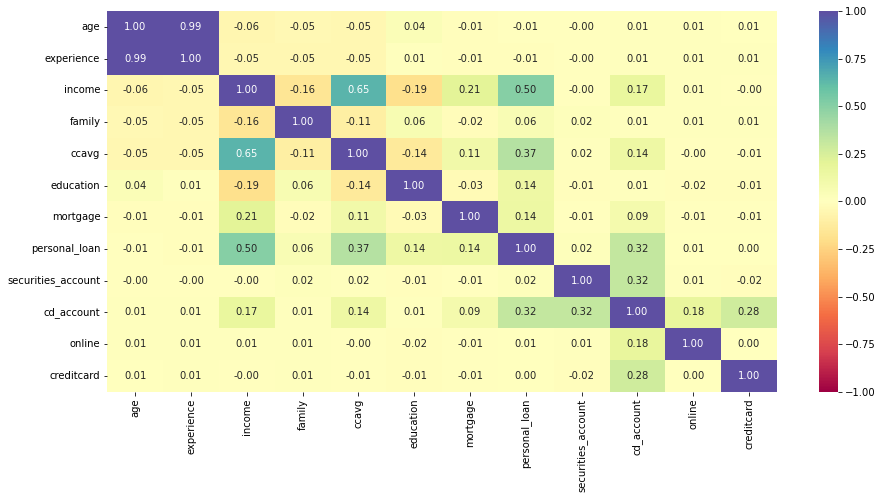

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Takeaway  
- Without outliers, we notice that, not many customers have mortgages. Most customers who do have mortgages and personal loan have high home value than those who don’t .
- without outliers, the average income of customers who have personal loan is higher approximately 135k. Those who don’t have a a personal loan have an average inome of approximately 60k
- without outliers, the average Spending of customers who have personal loan is higher approximately 3.8k. Those who don’t have a a personal loan have an average inome of approximately 1.75k

- On the correlation matrix, we see that experience and age, CCAvg and income, personal loan and income, CD and CCavg, CD. and credit card, CD and Security deposit  are Positively  correlated. Although we we have to keep in mind that correlation is not causation .

## Multivariate visualization 

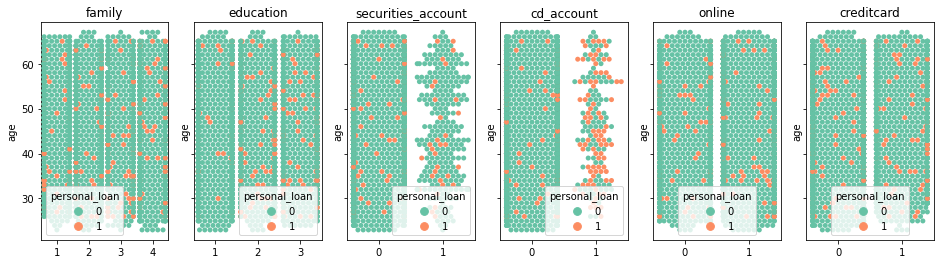

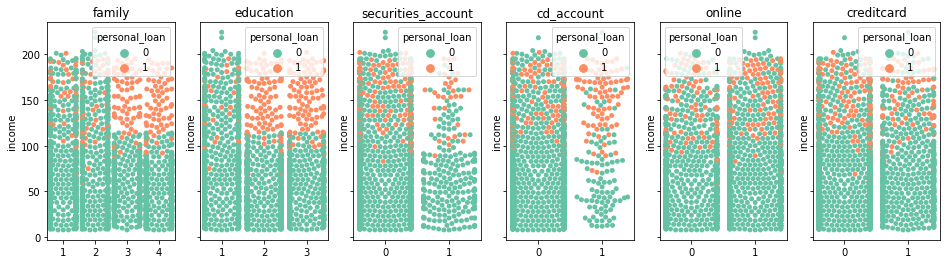

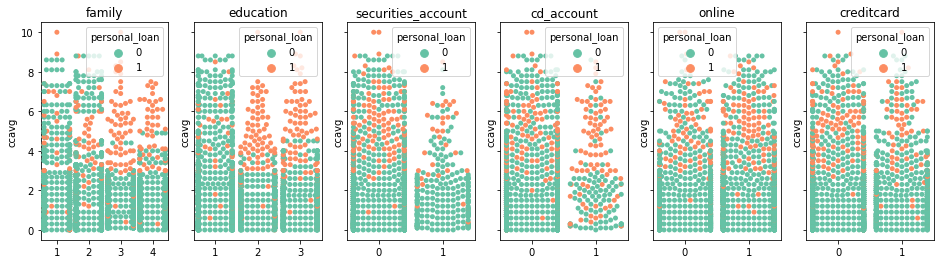

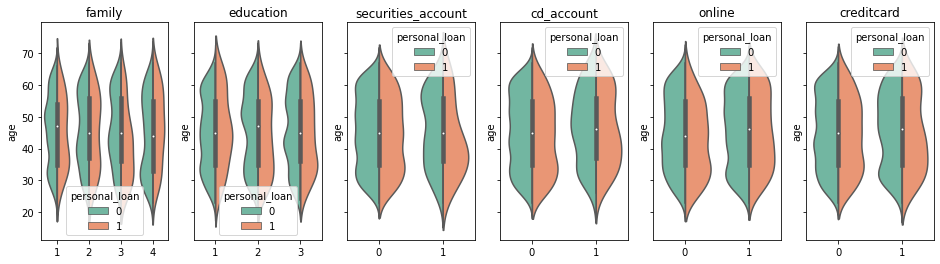

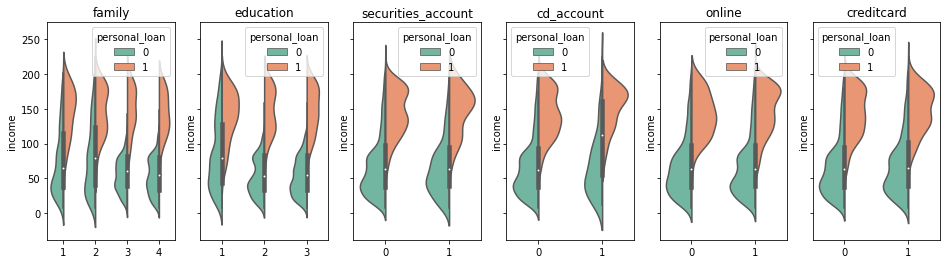

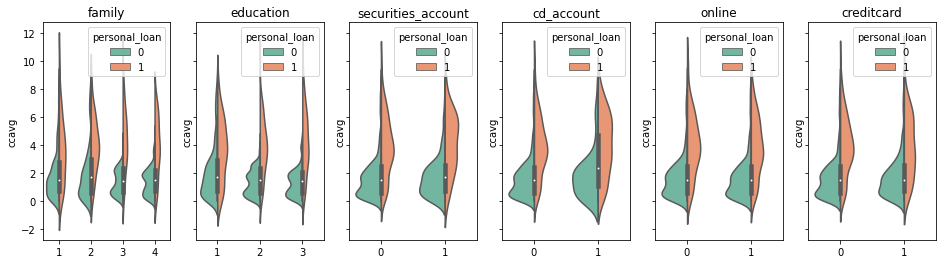

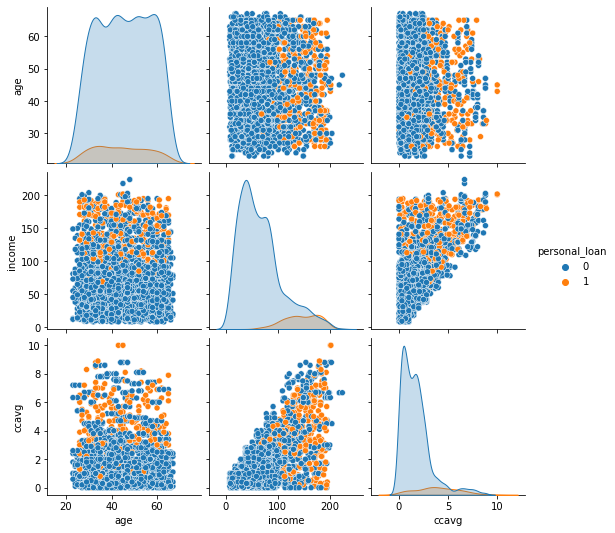

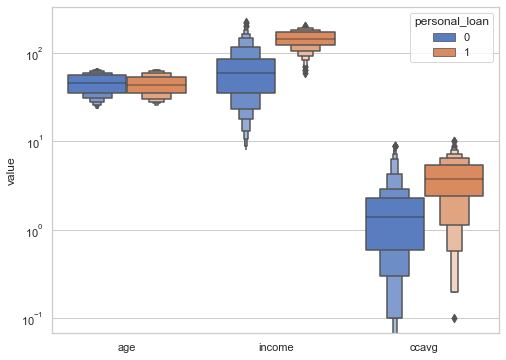

In [26]:
explore.explore_multivariate(train, target, cat_var, quant_vars2)

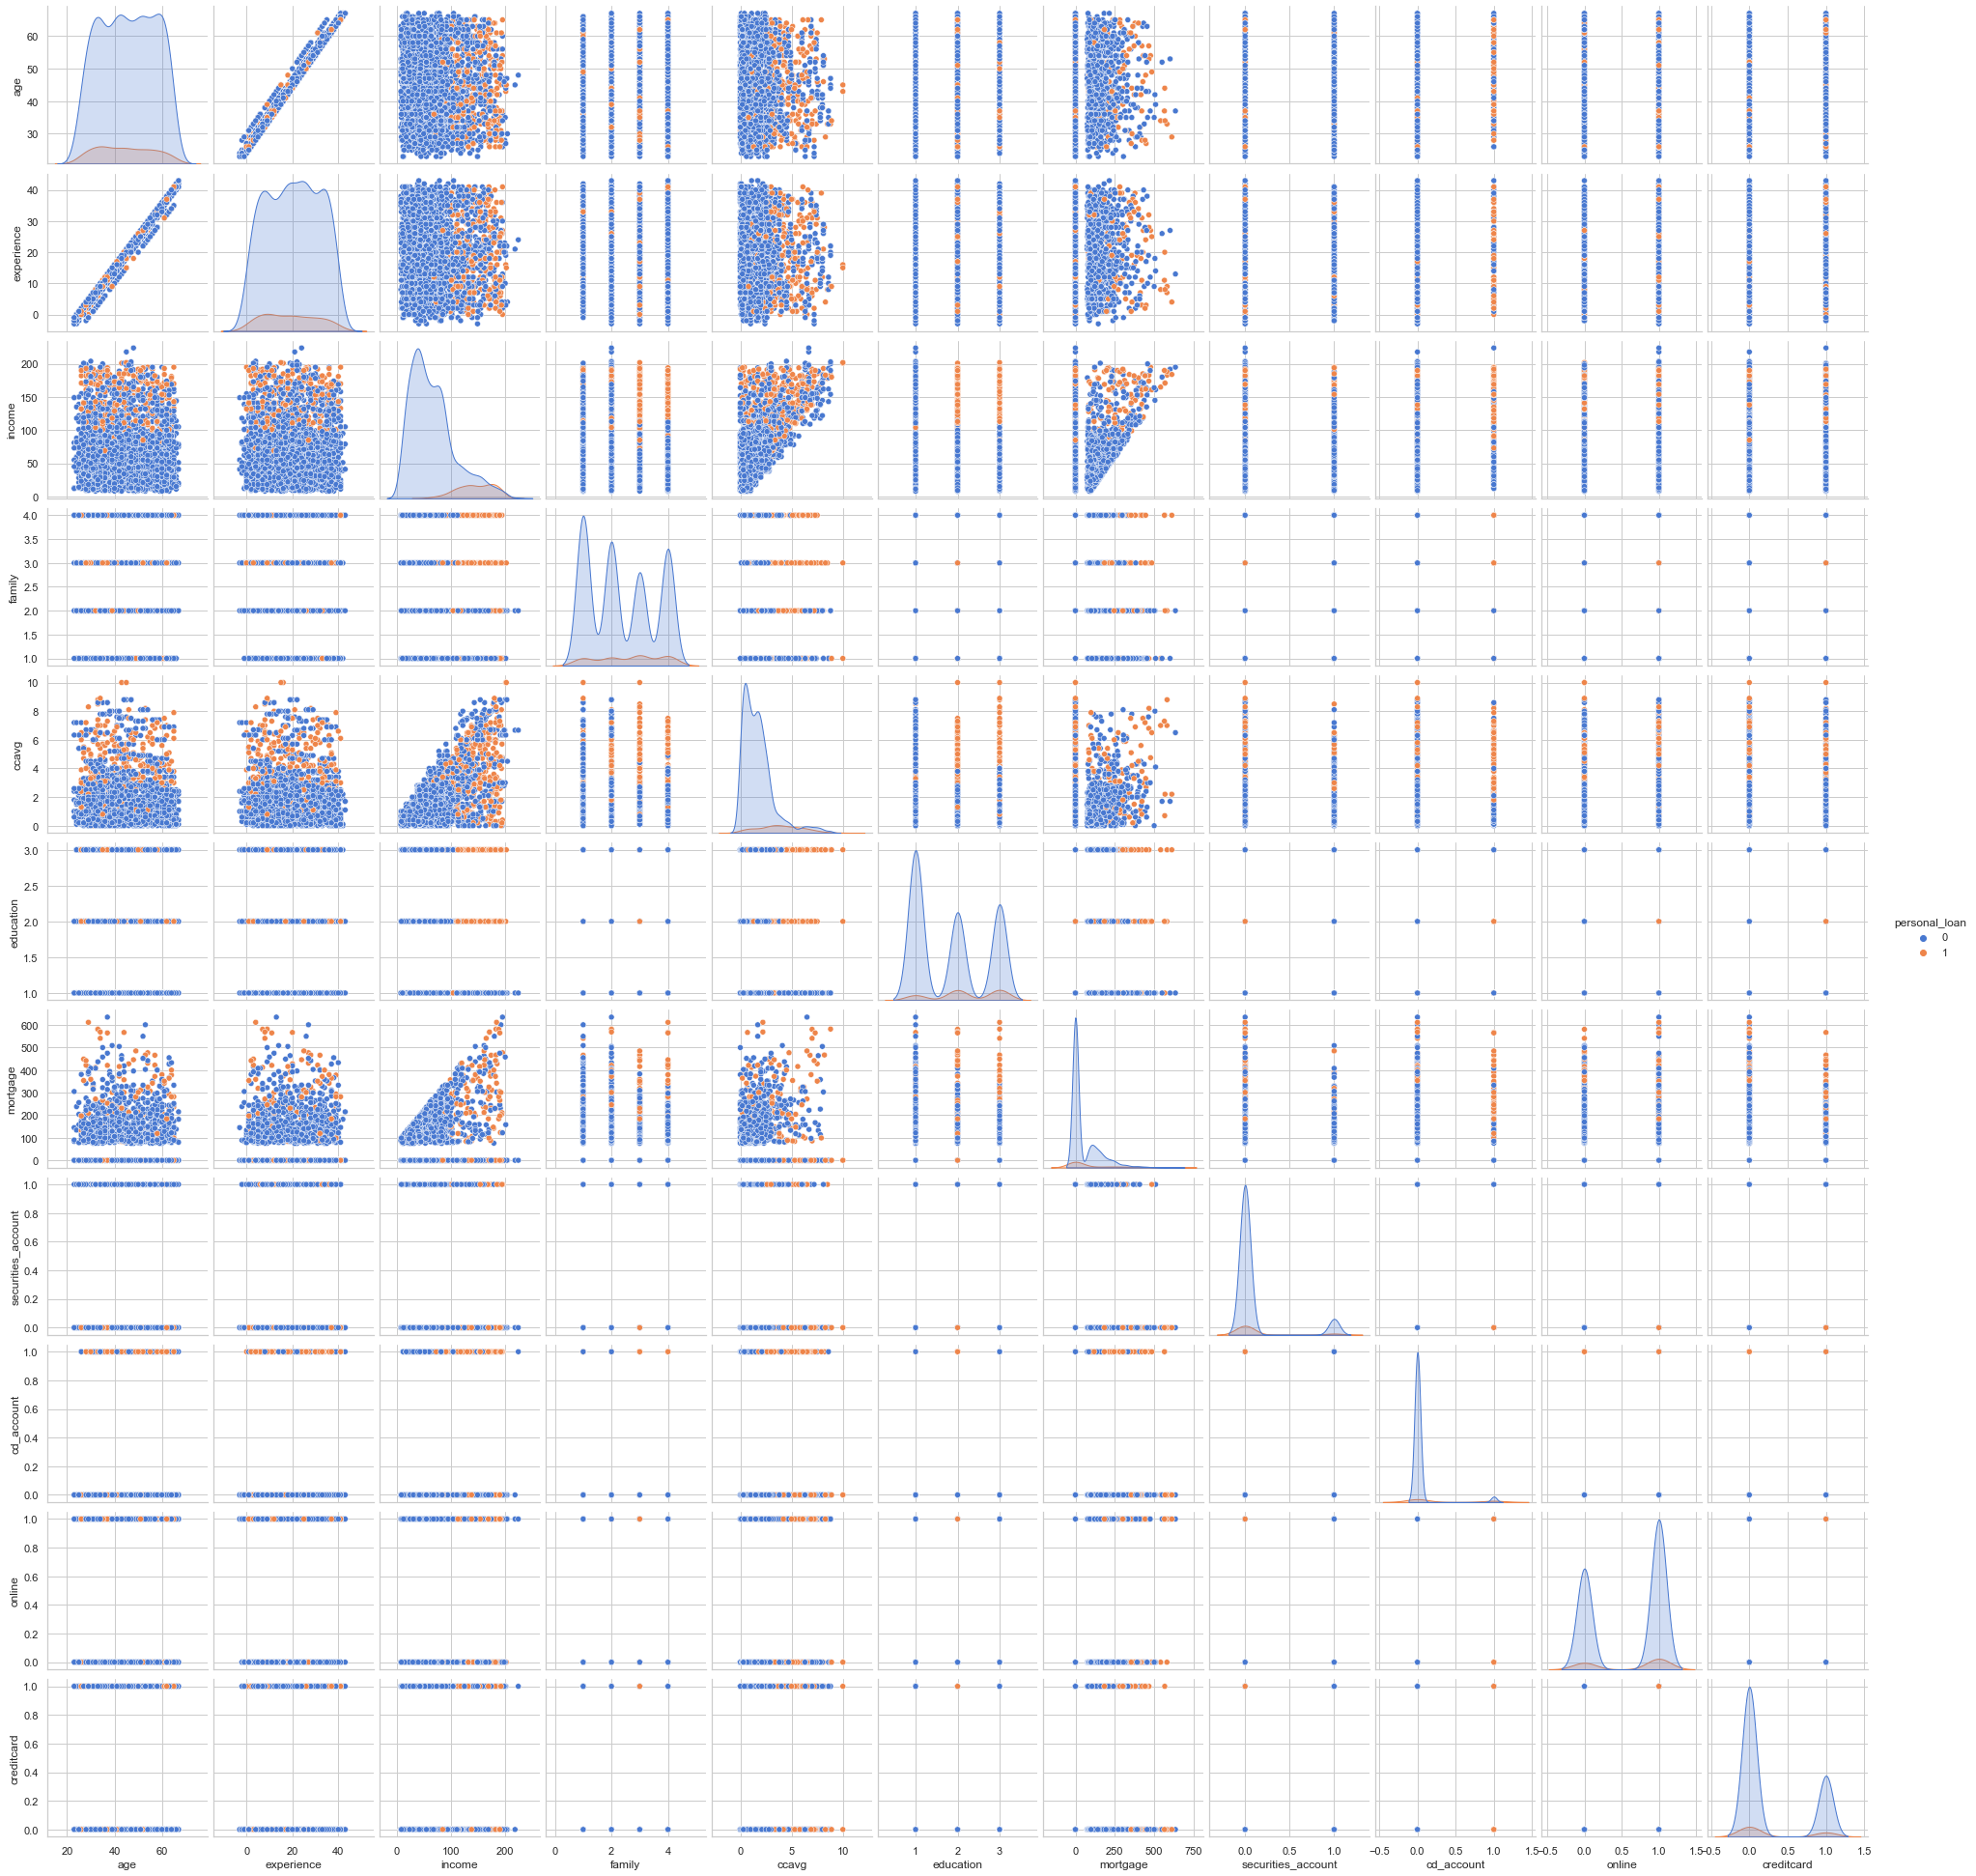

In [27]:
sns.pairplot(train, hue= target)
plt.show()

## Key Takeaway from the Multivariate Analysis
- Relative to age group, few customers have a Certificate of deposit (CD_Account), and those customers are more likely to get a personal loan
- Relative to income, customers with a family of 3 or more, with a graduate or Advanced degree, and with a CD Account are more likely to be have personal loan
- Relative to credit card spending, customers with an average from approximately 3.8k to 6k  month, with a family of 3 or more, with advanced degrees and cD Account are more likely to have a personal loan.

# Splitting data into train and test
## Actions for data pre-processing:
- lets take care of the outliers first
 

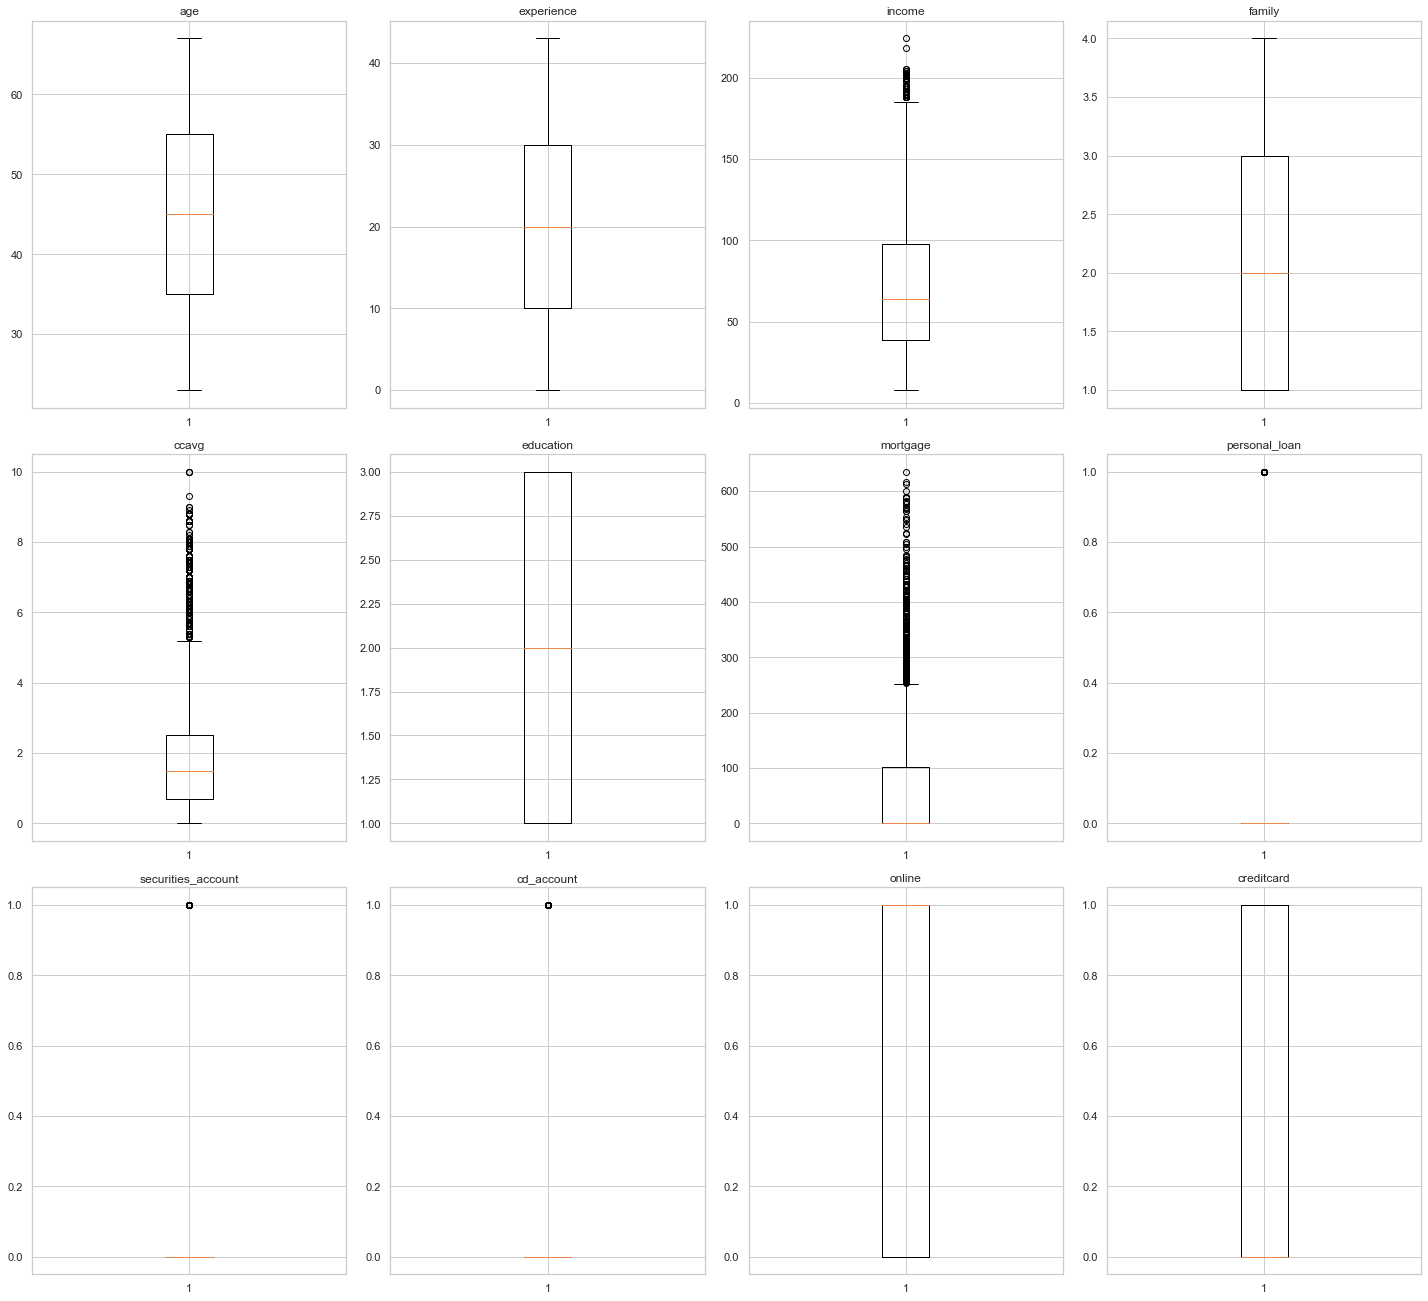

In [28]:
# Detecting all outliers in case we missed some in exploration
numerical_col = loan.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Mortgage , Income , and CCavg have upper outliers

In [29]:
#numerical_col2 = ['Mortgage', 'Income', 'CCAvg']
#loan = wrangle.treat_outliers_all(loan, numerical_col2)

In [30]:
train.head()

,id,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
2751,2752,47,23,32,92251,4,0.60,1,156,0,0,0,1,1
2780,2781,39,13,69,90630,3,0.90,2,0,0,0,0,0,0
4552,4553,50,23,64,92037,1,2.67,2,0,0,0,0,0,0
3648,3649,43,13,38,95616,3,2.00,3,0,0,0,0,1,0
3220,3221,61,35,28,93302,2,0.20,3,135,0,0,0,1,0


In [31]:
# identification of the variables that correllate with personalloan the most
traincorr = train.corr()
traincorr = traincorr.sort_values(by='personal_loan', ascending=False)
pd.DataFrame(traincorr.personal_loan)

,personal_loan
personal_loan,1.000000
income,0.495226
ccavg,0.371788
cd_account,0.334132
mortgage,0.135803
education,0.129681
family,0.065215
securities_account,0.022725
online,0.011616
creditcard,0.007726


In [32]:
#The least frequenly observed outcome will be our baseline
train.personal_loan.value_counts()

0    2531
1     269
Name: personal_loan, dtype: int64

# Modeling
- Creating training and test sets.

## Baseline Accuracy if we predict that no customer gets approved: 91%

In [33]:
X_train = train.drop(columns=['id', 'personal_loan'])
y_train = train.personal_loan

X_validate = validate.drop(columns=['id', 'personal_loan'])
y_validate = validate.personal_loan

X_test = test.drop(columns=['id', 'personal_loan'])
y_test = test.personal_loan

 ## Decision Tree

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.957143,0.957500,-0.000357
1,3,0.980714,0.980000,0.000714
2,4,0.988571,0.979167,0.009405
3,5,0.990000,0.978333,0.011667
4,6,0.992857,0.978333,0.014524
5,7,0.995000,0.977500,0.017500
6,8,0.996429,0.973333,0.023095
7,9,0.997857,0.975000,0.022857
8,10,0.998929,0.975000,0.023929
9,11,0.999643,0.973333,0.026310


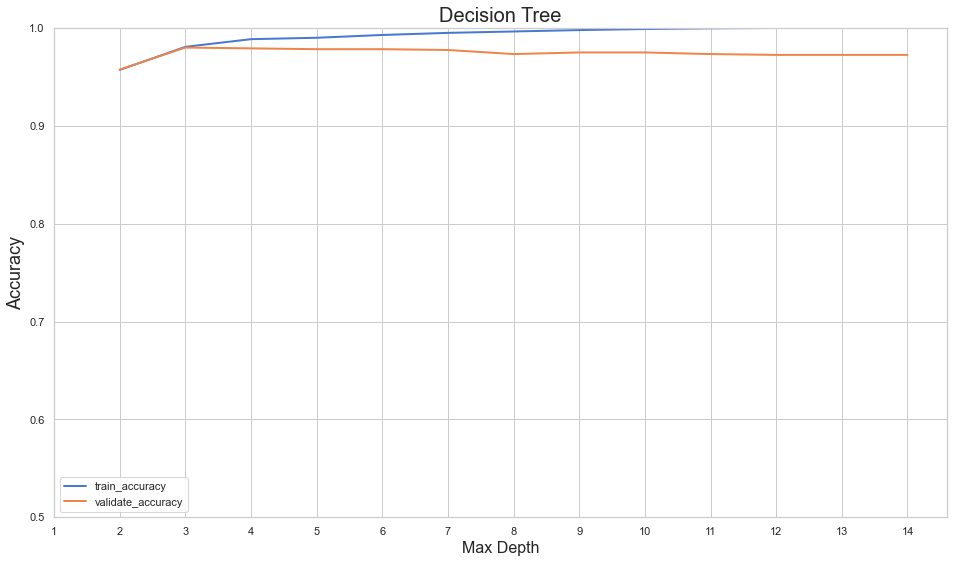

In [74]:
modeling.decision_tree(X_train, y_train, X_validate, y_validate, threshold=0.05, max_dep=15)


## Radom Forest

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,2,2,0.914286,0.912500,0.001786
1,2,3,0.914286,0.912500,0.001786
2,2,4,0.914286,0.912500,0.001786
3,2,5,0.914286,0.912500,0.001786
4,2,6,0.914286,0.912500,0.001786
5,3,2,0.943929,0.940833,0.003095
6,3,3,0.943929,0.940833,0.003095
7,3,4,0.943929,0.940000,0.003929
8,3,5,0.944286,0.940000,0.004286
9,3,6,0.944643,0.940000,0.004643


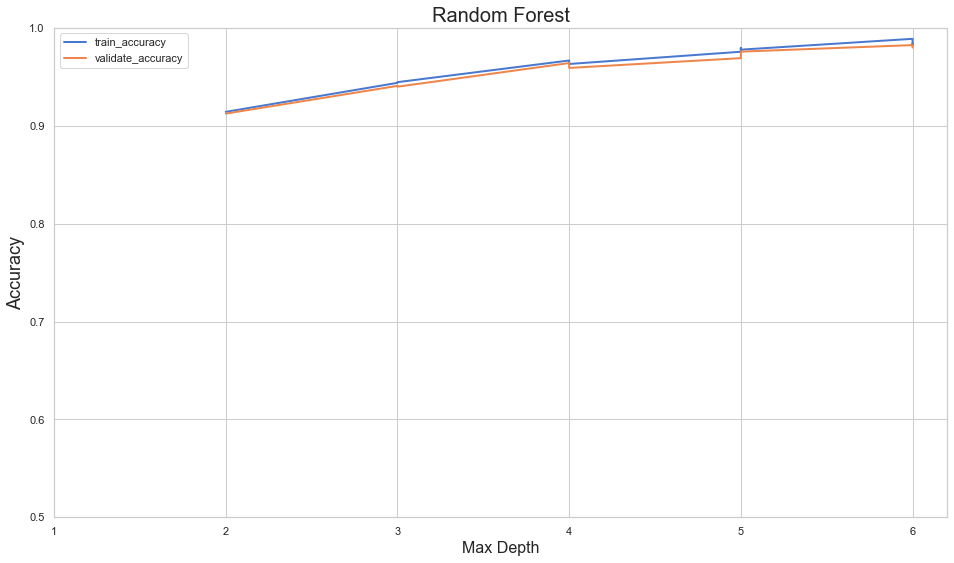

In [35]:
modeling.rand_forest(X_train, y_train, X_validate, y_validate, threshold=0.05, max_dep=7)

## KNN Model

,k,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.879167,0.120833
1,2,0.934643,0.897500,0.037143
2,3,0.943571,0.896667,0.046905
3,4,0.923214,0.901667,0.021548
4,5,0.926071,0.905000,0.021071
5,6,0.915000,0.905000,0.010000
6,7,0.915357,0.905000,0.010357
7,8,0.910714,0.899167,0.011548
8,9,0.914643,0.895000,0.019643
9,10,0.910357,0.904167,0.006190


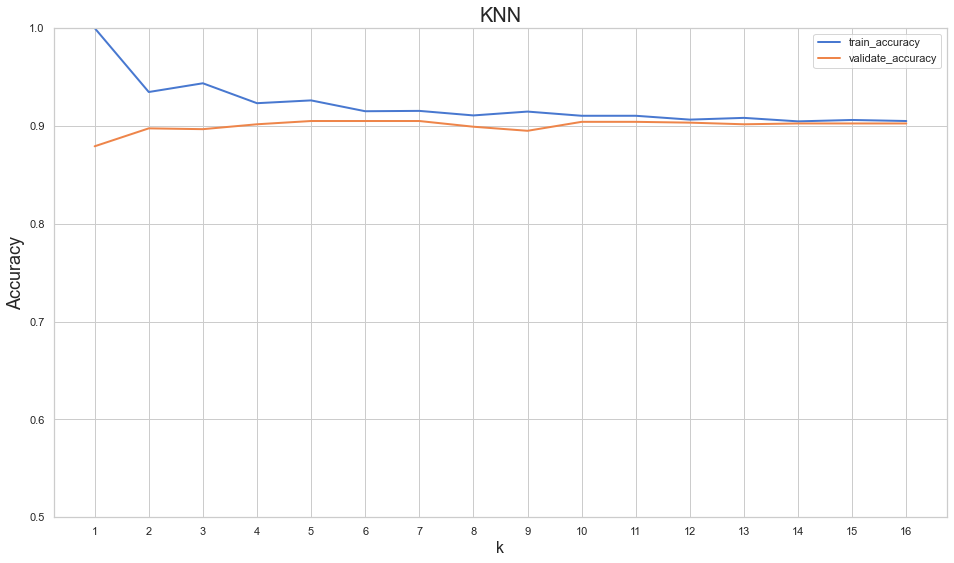

In [62]:
modeling.knn(X_train, y_train, X_validate, y_validate, max_k = 17)

## Logistic Regression

In [37]:
modeling.log_regression(X_train, y_train)

Coefficient: 
 [[-4.86804296e-04 -4.89502774e-04  3.50926884e-02 -6.38616554e-05
   1.64814487e-04  1.03458876e-03  2.26251659e-04  7.27455544e-04
   1.32217418e-05  1.37951353e-04  8.16241092e-06  7.10268243e-06]]
Intercept: 
 [-1.16168864e-07]
Train Confusion Matrix:
[[2457   74]
 [ 188   81]]

Train Data:


,0,1,accuracy,macro avg,weighted avg
precision,0.928922,0.522581,0.906429,0.725752,0.889885
recall,0.970763,0.301115,0.906429,0.635939,0.906429
f1-score,0.949382,0.382075,0.906429,0.665729,0.894880
support,2531.000000,269.000000,0.906429,2800.000000,2800.000000


In [38]:
modeling.log_regression_val(X_train, y_train, X_validate, y_validate)

Coefficient: 
 [[-4.86804296e-04 -4.89502774e-04  3.50926884e-02 -6.38616554e-05
   1.64814487e-04  1.03458876e-03  2.26251659e-04  7.27455544e-04
   1.32217418e-05  1.37951353e-04  8.16241092e-06  7.10268243e-06]]
Intercept: 
 [-1.16168864e-07]
Validate Confusion Matrix:
[[1059   26]
 [  85   30]]

Validate Data:


,0,1,accuracy,macro avg,weighted avg
precision,0.925699,0.535714,0.9075,0.730707,0.888326
recall,0.976037,0.260870,0.9075,0.618453,0.907500
f1-score,0.950202,0.350877,0.9075,0.650540,0.892767
support,1085.000000,115.000000,0.9075,1200.000000,1200.000000


## Models with Select features

In [39]:
X_train_feature = train.drop(columns=['id', 'personal_loan', 'zipcode', 'age'])
y_train_feature = train.personal_loan

X_validate_feature = validate.drop(columns=['id', 'personal_loan', 'zipcode', 'age'])
y_validate_feature = validate.personal_loan

X_test_feature = test.drop(columns=['id', 'personal_loan', 'zipcode', 'age'])
y_test_feature = test.personal_loan

## Decision Tree with Select features

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.957143,0.957500,-0.000357
1,3,0.980714,0.980000,0.000714
2,4,0.987500,0.979167,0.008333
3,5,0.990714,0.979167,0.011548
4,6,0.991786,0.979167,0.012619
5,7,0.995000,0.977500,0.017500
6,8,0.997500,0.977500,0.020000
7,9,0.997857,0.978333,0.019524
8,10,0.998214,0.975833,0.022381
9,11,0.998571,0.977500,0.021071


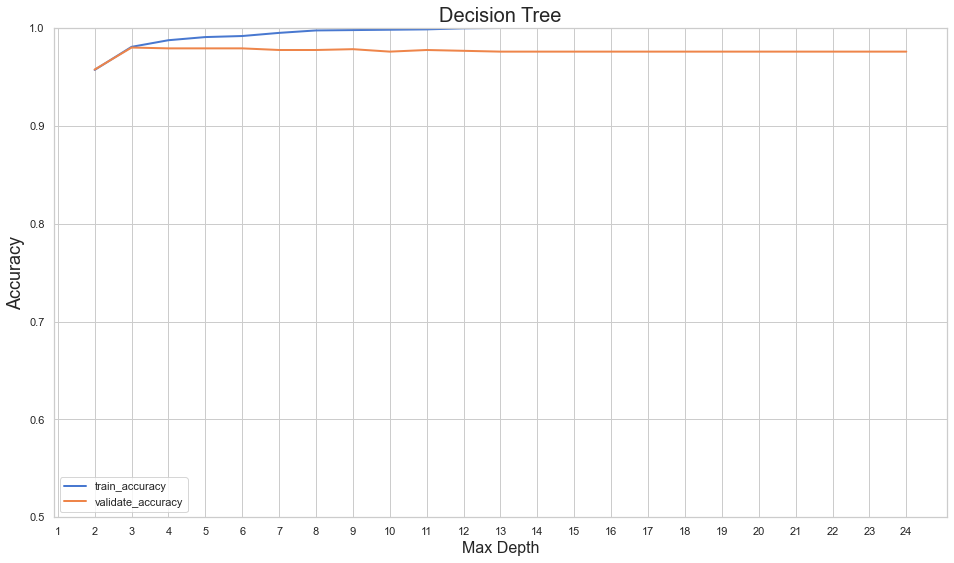

In [40]:
modeling.decision_tree(X_train_feature, y_train_feature, X_validate_feature, y_validate_feature, threshold=0.05, max_dep=25)

## Random Forest with Select features

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,2,2,0.916071,0.914167,0.001905
1,2,3,0.916071,0.914167,0.001905
2,2,4,0.916071,0.914167,0.001905
3,2,5,0.916071,0.914167,0.001905
4,2,6,0.916071,0.914167,0.001905
5,2,7,0.916071,0.914167,0.001905
6,3,2,0.947143,0.940000,0.007143
7,3,3,0.947143,0.940000,0.007143
8,3,4,0.947500,0.941667,0.005833
9,3,5,0.946786,0.940000,0.006786


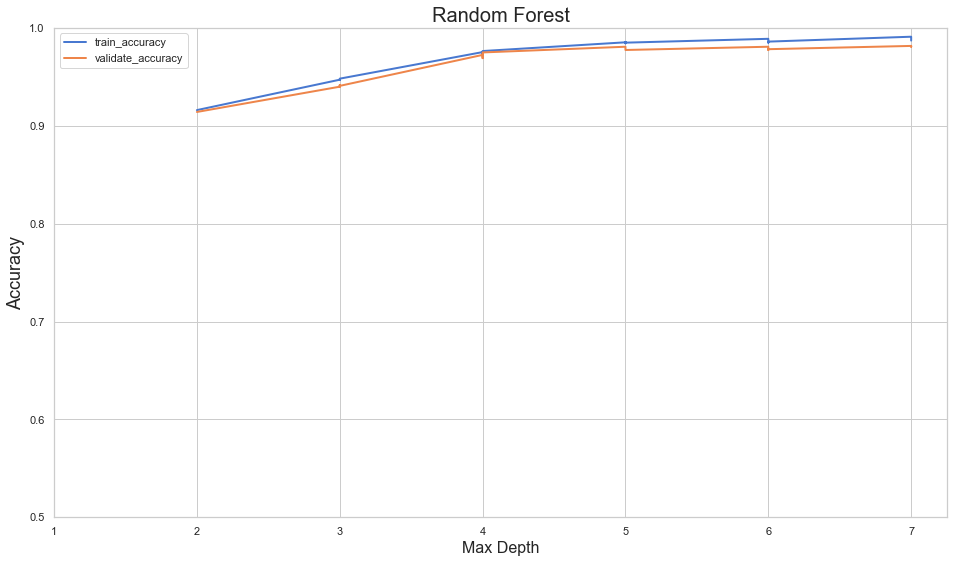

In [41]:
modeling.rand_forest(X_train_feature, y_train_feature, X_validate_feature, y_validate_feature, threshold=0.05, max_dep=8)

## KNN with Select features

,k,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.898333,0.101667
1,2,0.951071,0.909167,0.041905
2,3,0.955714,0.900833,0.054881
3,4,0.935357,0.903333,0.032024
4,5,0.932143,0.904167,0.027976
5,6,0.920714,0.907500,0.013214
6,7,0.923571,0.910000,0.013571
7,8,0.923214,0.902500,0.020714
8,9,0.923571,0.903333,0.020238
9,10,0.921429,0.900833,0.020595


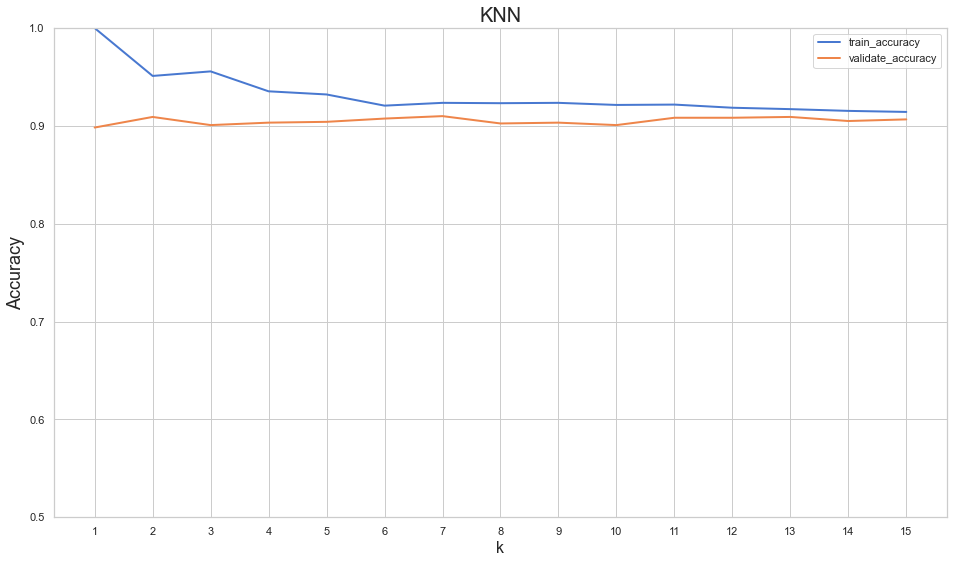

In [63]:
modeling.knn(X_train_feature, y_train_feature, X_validate_feature, y_validate_feature, max_k = 16)

## Logistic Regression with Select features

In [43]:
modeling.log_regression(X_train_feature, y_train_feature)

Coefficient: 
 [[-4.16585138e-03  4.08713080e-02  5.24087194e-01  1.63912575e-01
   1.15015782e+00  2.51185213e-04 -8.02474657e-01  5.07643507e+00
  -8.41719077e-01 -1.69024151e+00]]
Intercept: 
 [-10.04404092]
Train Confusion Matrix:
[[2494   37]
 [ 117  152]]

Train Data:


,0,1,accuracy,macro avg,weighted avg
precision,0.955190,0.804233,0.945,0.879711,0.940687
recall,0.985381,0.565056,0.945,0.775219,0.945000
f1-score,0.970051,0.663755,0.945,0.816903,0.940624
support,2531.000000,269.000000,0.945,2800.000000,2800.000000


In [64]:
modeling.log_regression_val(X_train_feature, y_train_feature, X_validate_feature, y_validate_feature)

Coefficient: 
 [[-4.16585138e-03  4.08713080e-02  5.24087194e-01  1.63912575e-01
   1.15015782e+00  2.51185213e-04 -8.02474657e-01  5.07643507e+00
  -8.41719077e-01 -1.69024151e+00]]
Intercept: 
 [-10.04404092]
Validate Confusion Matrix:
[[1072   13]
 [  43   72]]

Validate Data:


,0,1,accuracy,macro avg,weighted avg
precision,0.961435,0.847059,0.953333,0.904247,0.950474
recall,0.988018,0.626087,0.953333,0.807053,0.953333
f1-score,0.974545,0.720000,0.953333,0.847273,0.950152
support,1085.000000,115.000000,0.953333,1200.000000,1200.000000


## Models with scaled Features 

In [65]:
# Scaling:
scaler = sklearn.preprocessing.MinMaxScaler() # Min Max Linear Scaler
scaler.fit(X_train_feature) # Fit on Train
X_train_scaled_feature = scaler.transform(X_train_feature) # transform on train
X_validate_scaled_feature = scaler.transform(X_validate_feature) # transform on validate
X_test_scaled_feature = scaler.transform(X_test_feature)

## KNN with scaled featues

,k,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.956667,0.043333
1,2,0.973214,0.951667,0.021548
2,3,0.980714,0.958333,0.022381
3,4,0.967143,0.950000,0.017143
4,5,0.971429,0.956667,0.014762
5,6,0.958929,0.945000,0.013929
6,7,0.964286,0.951667,0.012619
7,8,0.958214,0.943333,0.014881
8,9,0.960714,0.945833,0.014881
9,10,0.951786,0.943333,0.008452


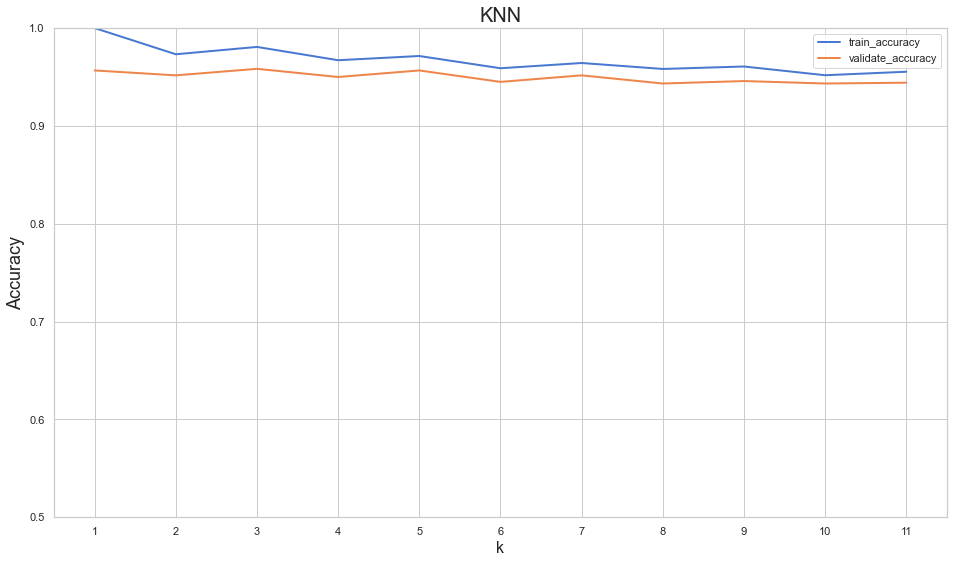

In [66]:
modeling.knn(X_train_scaled_feature, y_train_feature, X_validate_scaled_feature, y_validate_feature, max_k = 12)

## Logistic Regression With Scaled features 

In [67]:
modeling.log_regression(X_train_scaled_feature, y_train_feature)

Coefficient: 
 [[ 0.14815591  7.96983347  1.49999609  1.80944709  2.48792165  0.44742818
  -0.71511931  2.88486758 -0.48104059 -0.8982766 ]]
Intercept: 
 [-8.04869155]
Train Confusion Matrix:
[[2509   22]
 [ 121  148]]

Train Data:


,0,1,accuracy,macro avg,weighted avg
precision,0.953992,0.870588,0.948929,0.912290,0.945980
recall,0.991308,0.550186,0.948929,0.770747,0.948929
f1-score,0.972292,0.674260,0.948929,0.823276,0.943660
support,2531.000000,269.000000,0.948929,2800.000000,2800.000000


In [68]:
modeling.log_regression_val(X_train_scaled_feature, y_train_feature, X_validate_scaled_feature, y_validate_feature)

Coefficient: 
 [[ 0.14815591  7.96983347  1.49999609  1.80944709  2.48792165  0.44742818
  -0.71511931  2.88486758 -0.48104059 -0.8982766 ]]
Intercept: 
 [-8.04869155]
Validate Confusion Matrix:
[[1077    8]
 [  51   64]]

Validate Data:


,0,1,accuracy,macro avg,weighted avg
precision,0.954787,0.888889,0.950833,0.921838,0.948472
recall,0.992627,0.556522,0.950833,0.774574,0.950833
f1-score,0.973339,0.684492,0.950833,0.828916,0.945658
support,1085.000000,115.000000,0.950833,1200.000000,1200.000000


## Models Reports

In [69]:
modeling.model_report_all_data()

,Model,Parameters,Train,Validate,Difference
0,DT,Max Depth = 3,0.792,0.794,-0.002
1,RF,Max Depth = 6 & Min Sample Leaf = 2,0.818,0.808,0.010
2,KNN,KNN = 19,0.796,0.789,0.007
3,LR,Default,0.805,0.792,0.013


In [70]:
modeling.model_report_select_data()

,Model,Parameters,Train,Validate,Difference
0,DT,Max Depth = 5,0.798,0.794,0.004
1,RF,Max Depth = 6 & Min Sample Leaf = 4,0.812,0.802,0.010
2,KNN,KNN = 14,0.813,0.800,0.013
3,LR,Default,0.807,0.801,0.006


## Takeaway
- Radom Forest is performing well on the dataset with all features as well as select features
- we are going to test our best model on the testing set

In [71]:
# train best
modeling.best_rf(X_train, y_train, y_train, X_train)

,0,1,accuracy,macro avg,weighted avg
precision,0.988281,0.995833,0.988929,0.992057,0.989007
recall,0.999605,0.888476,0.988929,0.944040,0.988929
f1-score,0.993911,0.939096,0.988929,0.966504,0.988645
support,2531.000000,269.000000,0.988929,2800.000000,2800.000000


In [72]:
# validate best
modeling.best_rf(X_train, y_train, y_validate, X_validate)

,0,1,accuracy,macro avg,weighted avg
precision,0.982759,0.979592,0.9825,0.981175,0.982455
recall,0.998157,0.834783,0.9825,0.916470,0.982500
f1-score,0.990398,0.901408,0.9825,0.945903,0.981870
support,1085.000000,115.000000,0.9825,1200.000000,1200.000000


In [73]:
#test best
modeling.best_rf(X_train, y_train, y_test, X_test)

,0,1,accuracy,macro avg,weighted avg
precision,0.988999,0.945055,0.985,0.967027,0.98478
recall,0.994469,0.895833,0.985,0.945151,0.98500
f1-score,0.991726,0.919786,0.985,0.955756,0.98482
support,904.000000,96.000000,0.985,1000.000000,1000.00000


## Key Takeaway 
- We have been able to build a predictive model that can be used by to  whether or not a customer will get a personal loan with an accuracy of 0.98% on the training set and formulate policies accordingly.
- Coefficient of Age, Security Accounts, Online banking, Credit Card and Family of 1 and 2 are negatives. Increase in these, will lead to decrease chances of having a loan.
- Coefficient of CD_Account, Credit Card spending , Education,  and Family of 3 and 4 are positives. Increase in these, will lead to increase chances of having a loan.

# Conclusion
- Income, Education Grad and Advanced, family, and avarege credit card spending, are the top 4 important features used by the bank to determine whether or not a Customer qualifies for a personal loan
- Radom forest with Max Depth = 6 & Min Sample Leaf = 4 is our best model. It was able to predict that a customer will not ave a loan with an accuracy of 98 %, that is an improvement of 7% over the baseline accuracy

# Recommendations

# Next Steps
- if i had more time, i would perform further analysis to find out unique characteristics of customers with personal loan , and perform feature engineering to help improve the model